### РК2 Голубев Сергей ИУ5-65Б 
### ИУ5-65Б	Метод опорных векторов	Градиентный бустинг
### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

### Подготовка датасета

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [5]:
data['oldpeak'].value_counts()

0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.9     5
1.5     5
0.5     5
3.0     5
2.2     4
3.6     4
2.4     3
3.4     3
4.0     3
0.9     3
0.3     3
2.3     2
4.2     2
1.1     2
2.5     2
3.2     2
6.2     1
2.1     1
4.4     1
1.3     1
3.1     1
0.7     1
5.6     1
3.8     1
2.9     1
3.5     1
Name: oldpeak, dtype: int64

In [6]:
data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

## Проверим, есть ли пропущенные значения

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Построим корреляционную матрицу

<AxesSubplot:>

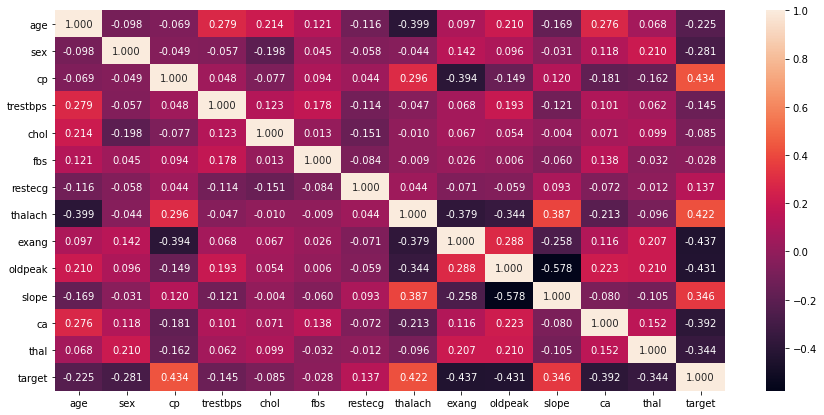

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.3f')

## Разделим выборку на обучающую и тестовую
#### Разделим данные на целевой столбец и признаки

In [10]:
X = data.drop('sex',axis=1)
Y = data['sex']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((227, 13), (76, 13), (227,), (76,))

## Метод опорных векторов

In [12]:
def print_metrics(X_train, Y_train, X_test, Y_test, clf):
    clf.fit(X_train, Y_train)
    target = clf.predict(X_test)
    print(f'Средняя абсолютная ошибка: {mean_absolute_error(Y_test, target)}')
    print(f'Коэффициент детерминации: {r2_score(Y_test, target)}')

In [13]:
print_metrics(X_train, Y_train, X_test, Y_test, SVR())

Средняя абсолютная ошибка: 0.4182385800509786
Коэффициент детерминации: -0.3329539712678118


## Метод градиентного бустинга

In [14]:
def print_metrics(X_train, Y_train, X_test, Y_test, clf):
    clf.fit(X_train, Y_train)
    target = clf.predict(X_test)
    print(f'Средняя абсолютная ошибка: {mean_absolute_error(Y_test, target)}')
    print(f'Коэффициент детерминации: {r2_score(Y_test, target)}')

In [15]:
print_metrics(X_train, Y_train, X_test, Y_test, GradientBoostingRegressor(random_state=0))

Средняя абсолютная ошибка: 0.3482250717118522
Коэффициент детерминации: 0.11589052353698726


## Выводы:

В РК были использованы метрики:

Mean absolute error - средняя абсолютная ошибка

R2 (коэффициент детерминации) позволяет оценить общее качество модели, чем R2 ближе к 1, тем модель лучше.

Метод градиентного бустинга и метод опорных векторов показали себя примерно одинакого по отношению к данной модели. В выборке слабая связность датасета. Поэтому метрика R2 мала у метода опорных векторов и у метода градинтного бустинга.